In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

dataset = pd.read_csv('Master_File_Housing_Data.csv')
dataset.head()

,APN,FORMATTED_ADDRESS,COMMUNITY,ABOVEGROUNDAREA,BELOWGROUNDAREA,PARCEL_AREA_SQFT,YEARBUILT,BATHROOMS,BEDROOMS,NUM_STORIES,FIREPLACES,CONSTRUCTIONTYPE,Assessed Value,Sale Price
0,302924440099,2910 California St,NORTHEAST,NaN,NaN,10640,NaN,NaN,NaN,NaN,NaN,NaN,320000,352500
1,402824210259,3041 Holmes Ave #401,CALHOUN-ISLE,NaN,NaN,11425,NaN,NaN,NaN,NaN,NaN,NaN,460000,1359150
2,402824240090,3248 Holmes Ave,CALHOUN-ISLE,NaN,NaN,5450,NaN,NaN,NaN,NaN,NaN,NaN,520500,555350
3,602823110060,3117 42ND Ave S,LONGFELLOW,NaN,NaN,6750,NaN,NaN,NaN,NaN,NaN,NaN,350000,650000
4,802824430075,4433 Washburn Ave S,SOUTHWEST,NaN,NaN,5670,NaN,NaN,NaN,NaN,NaN,NaN,900000,1245000


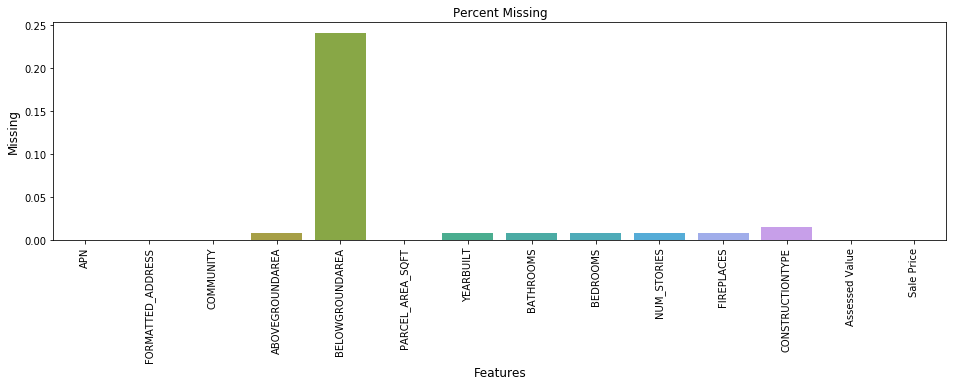

In [3]:
# Visually see NaN values per feature.
import seaborn as sns

nan_df = (dataset.isna().sum() / dataset.shape[0]).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(16,4))
sns.barplot(nan_df['feature'], nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [4]:
df= dataset.dropna(how='any', subset=['CONSTRUCTIONTYPE'])
df['BELOWGROUNDAREA'].fillna(0,inplace=True)

X = df.iloc[:,2:-1].values
y = df.iloc[:,13].values

X

C:\Users\16123\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([['CALHOUN-ISLE', 343.0, 0.0, ..., 0.0, 'Wood Frame', 91500],
       ['CALHOUN-ISLE', 343.0, 0.0, ..., 0.0, 'Wood Frame', 93000],
       ['CENTRAL', 344.0, 0.0, ..., 0.0, 'Wood Frame', 80000],
       ...,
       ['SOUTHWEST', 6565.0, 3171.0, ..., 2.0, 'Concrete', 1400000],
       ['CALHOUN-ISLE', 6857.0, 2733.0, ..., 5.0, 'Wood Frame', 2319500],
       ['CALHOUN-ISLE', 6972.0, 3399.0, ..., 2.0, 'Wood Frame', 2992500]],
      dtype=object)

In [5]:
y

array([ 115000,  110000,  100000, ..., 1300000, 1472500, 2636041],
      dtype=int64)

In [6]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean') 
imputer.fit(X[:,[1,3,5,6,7,8,10]])
X[:,[1,3,5,6,7,8,10]]= imputer.transform(X[:,[1,3,5,6,7,8,10]])

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 9] = labelencoder.fit_transform(X[:, 9])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,9])
data = onehotencoder.fit_transform(X).toarray()

X = data[:, 1:]
X = data[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25]]

import statsmodels.api as sm

X_sig = X[:,[1,2,3,4,5,6,7,8,9,10,11,16,17,19,20,21,22,23]]
obj_OLS = sm.OLS(endog = y, exog = X_sig).fit() 
obj_OLS.summary()

C:\Users\16123\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\16123\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\16123\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_fea

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              3792.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):                        0.00
Time:                        14:25:39   Log-Likelihood:                         -73867.
No. Observations:                5684   AIC:                                  1.478e+05
Df Residuals:                    5666   BIC:                                  1.479e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.658e+04   6011.004      4.423      0.000    1.48e+04    3.84e+04
x2          4355.0248   5942.160      0.733      0.464   -7293.883     1.6e+04
x3          1720.9062   6374.186      0.270      0.787   -1.08e+04    1.42e+04
x4          2655.9961   4730.335      0.561      0.574   -6617.271    1.19e+04
x5          8072.8690   5556.368      1.453      0.146   -2819.738     1.9e+04
x6         -1.028e+04   1.22e+04     -0.840      0.401   -3.43e+04    1.37e+04
x7          3078.4576   5220.615      0.590      0.555   -7155.947    1.33e+04
x8          1.779e+04   4933.428      3.607      0.000    8121.188    2.75e+04
x9          1.618e+04   7750.841      2.087      0.037     983.360    3.14e+04
x10         4.331e+04   1.29e+04      3.359      0.001     1.8e+04    6.86e+04
x11        -3093.8410   6914.969     -0.447      0.655   -1.66e+04    1.05e+04
x12           36.0789      6.457      5.588      0.000      23.421      48.736
x13           -0.1081      0.043     -2.504      0.012      -0.193      -0.023
x14         1.306e+04   2502.993      5.218      0.000    8153.996     1.8e+04
x15        -2897.9769   1904.719     -1.521      0.128   -6631.955     836.001
x16        -7462.0380   3822.377     -1.952      0.051    -1.5e+04      31.285
x17        -7073.0604   2778.356     -2.546      0.011   -1.25e+04   -1626.419
x18            0.8621      0.014     61.736      0.000       0.835       0.890
==============================================================================
Omnibus:                    11345.356   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         74647976.063
Skew:                          15.696   Prob(JB):                         0.00
Kurtosis:                     563.541   Cond. No.                     3.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
df.dtypes

APN                    int64
FORMATTED_ADDRESS     object
COMMUNITY             object
ABOVEGROUNDAREA      float64
BELOWGROUNDAREA      float64
PARCEL_AREA_SQFT       int64
YEARBUILT            float64
BATHROOMS            float64
BEDROOMS             float64
NUM_STORIES          float64
FIREPLACES           float64
CONSTRUCTIONTYPE      object
Assessed Value         int64
Sale Price             int64
dtype: object

In [8]:
df['COMMUNITY'].unique()

array(['CALHOUN-ISLE', 'CENTRAL', 'POWDERHORN', 'NOKOMIS', 'UNIVERSITY',
       'SOUTHWEST', 'LONGFELLOW', 'NORTHEAST', 'CAMDEN', 'NEAR NORTH',
       'PHILLIPS'], dtype=object)

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.iloc[:,1:14].describe()

,ABOVEGROUNDAREA,BELOWGROUNDAREA,PARCEL_AREA_SQFT,YEARBUILT,BATHROOMS,BEDROOMS,NUM_STORIES,FIREPLACES,Assessed Value,Sale Price
count,5684.00,5684.00,5684.00,5684.00,5684.00,5684.00,5684.00,5684.00,5684.00,5684.00
mean,1270.57,659.34,18497.62,1940.33,1.71,2.65,1.38,0.41,299602.43,312517.68
std,515.43,429.12,38913.08,32.39,0.82,1.04,0.45,0.63,206687.98,224766.12
min,343.00,0.00,486.00,1874.00,0.00,0.00,0.00,0.00,0.00,1200.00
25%,956.00,374.75,5100.00,1916.00,1.00,2.00,1.00,0.00,179000.00,189858.00
50%,1168.00,768.00,5670.00,1927.00,2.00,3.00,1.20,0.00,252000.00,262796.00
75%,1475.75,936.00,8581.00,1956.00,2.00,3.00,1.70,1.00,348500.00,360371.00
max,6972.00,3399.00,315895.00,2018.00,8.00,8.00,4.00,5.00,3320000.00,4800000.00


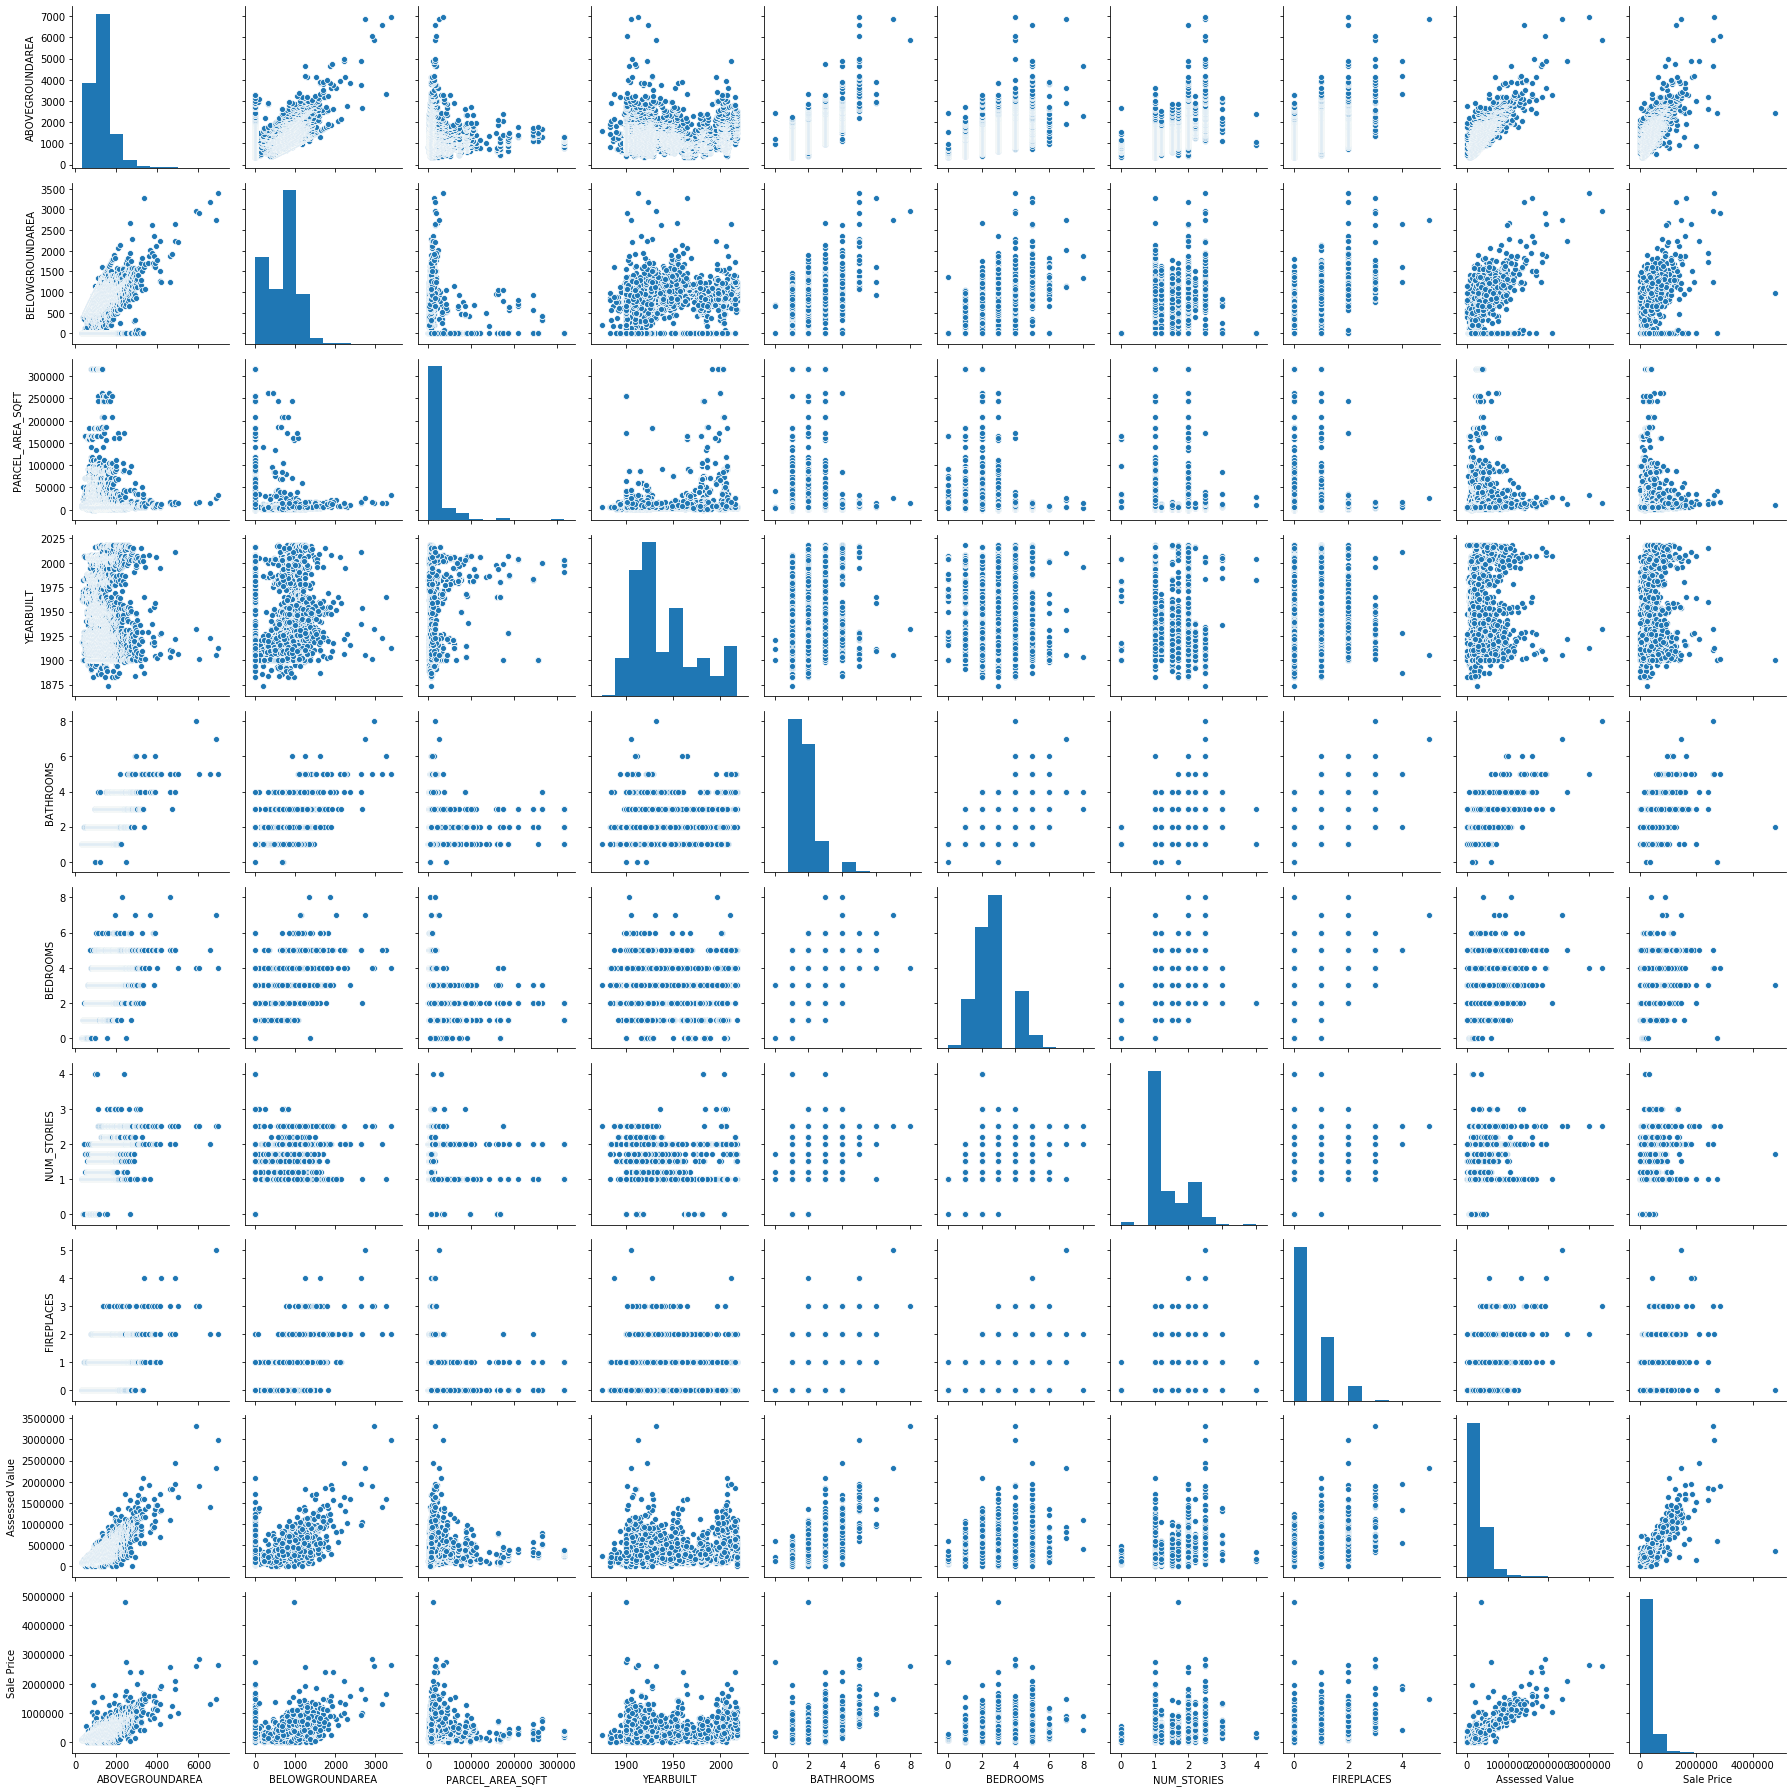

In [10]:
# Quick overview of data distribution
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(df.iloc[:,1:14], height=2.5)
plt.tight_layout()

Linear relationships:
* assessed value and sale price
* above ground area and sale price
* above ground area and assessed value
* above ground area and below ground area
* below ground area and sale price
* below ground area and assessed value

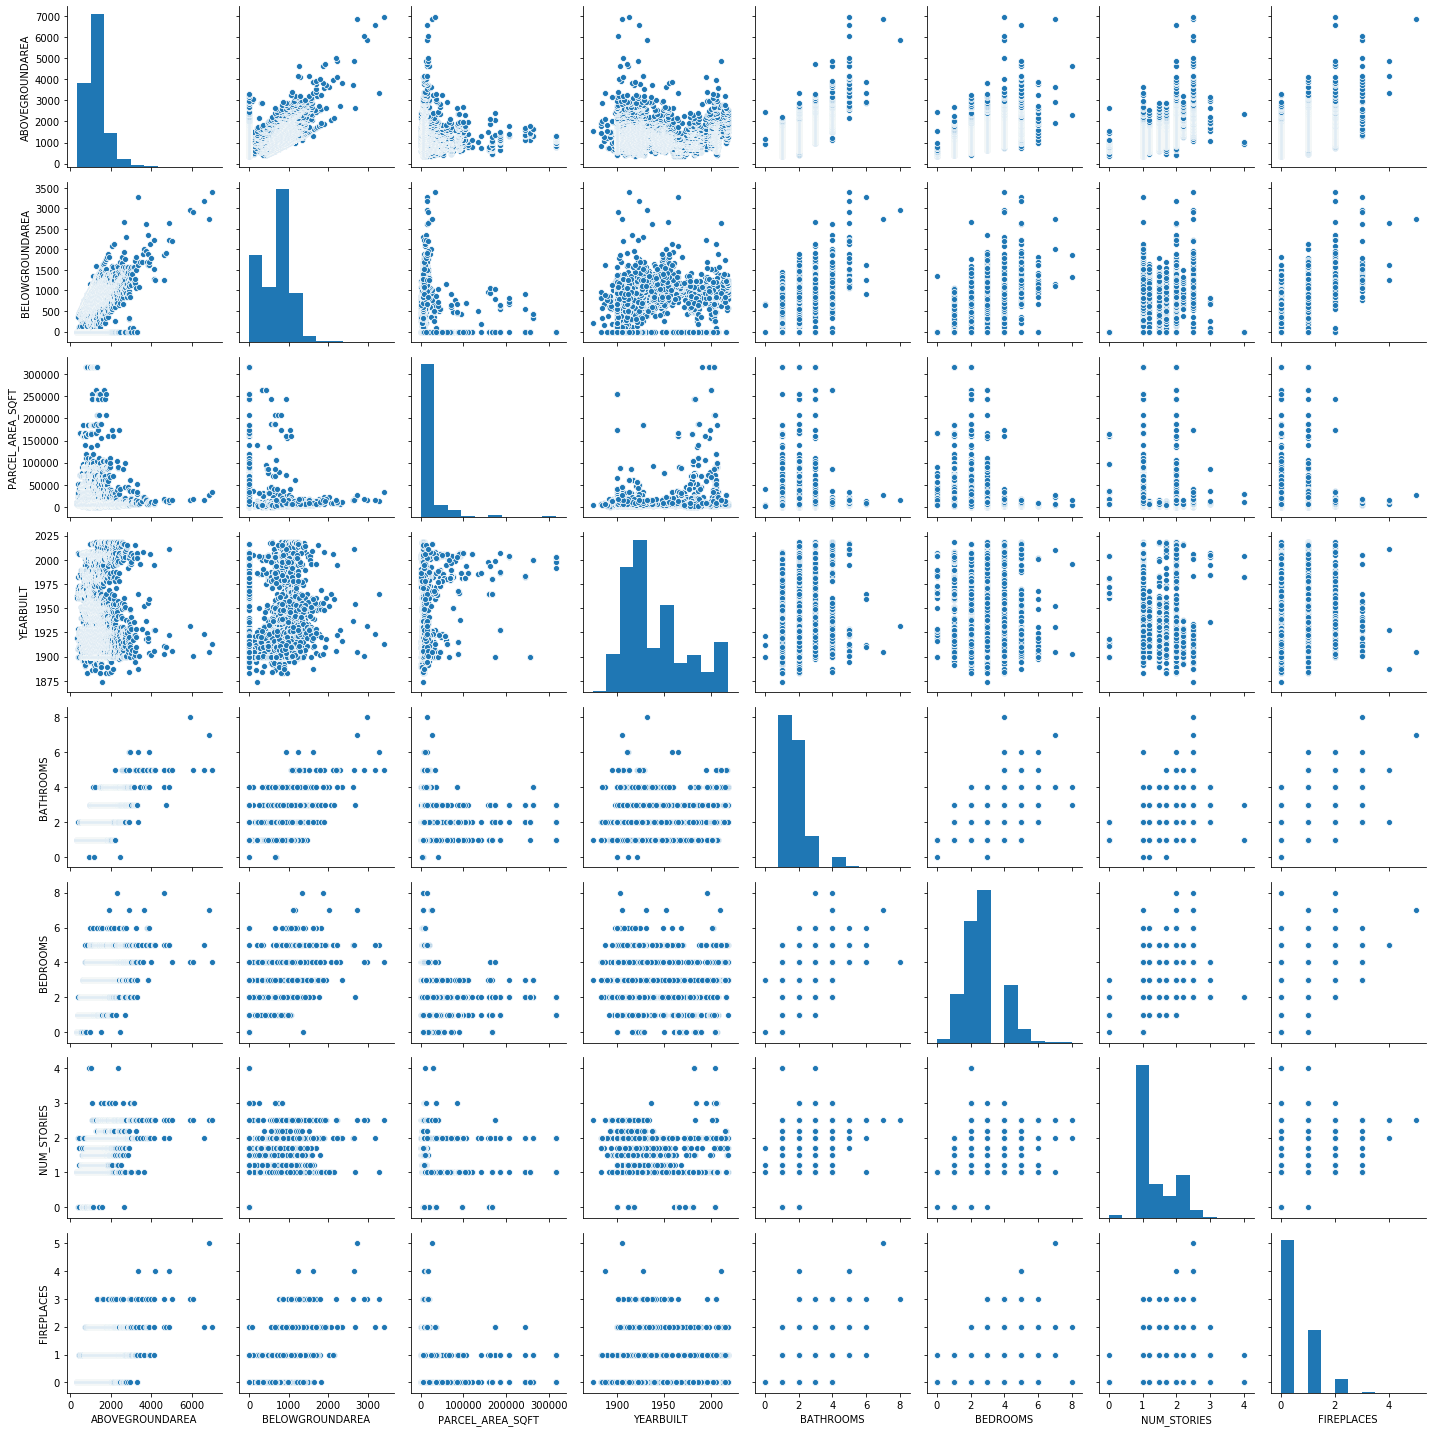

In [40]:
sns.pairplot(df.iloc[:,1:12], height=2.5)
plt.tight_layout()

In [47]:
corrmat = df.corr()
corrmat

,APN,ABOVEGROUNDAREA,BELOWGROUNDAREA,PARCEL_AREA_SQFT,YEARBUILT,BATHROOMS,BEDROOMS,NUM_STORIES,FIREPLACES,Assessed Value,Sale Price
APN,1.00,0.07,-0.27,0.28,0.30,0.10,-0.17,-0.04,0.08,0.20,0.19
ABOVEGROUNDAREA,0.07,1.00,0.48,-0.08,-0.01,0.68,0.59,0.59,0.50,0.78,0.71
BELOWGROUNDAREA,-0.27,0.48,1.00,-0.45,-0.28,0.36,0.64,0.30,0.45,0.32,0.27
PARCEL_AREA_SQFT,0.28,-0.08,-0.45,1.00,0.39,-0.00,-0.31,-0.13,-0.11,0.03,0.02
YEARBUILT,0.30,-0.01,-0.28,0.39,1.00,0.19,-0.19,-0.21,0.04,0.13,0.12
BATHROOMS,0.10,0.68,0.36,-0.00,0.19,1.00,0.48,0.42,0.43,0.64,0.59
BEDROOMS,-0.17,0.59,0.64,-0.31,-0.19,0.48,1.00,0.46,0.32,0.32,0.29
NUM_STORIES,-0.04,0.59,0.30,-0.13,-0.21,0.42,0.46,1.00,0.25,0.35,0.31
FIREPLACES,0.08,0.50,0.45,-0.11,0.04,0.43,0.32,0.25,1.00,0.52,0.45
Assessed Value,0.20,0.78,0.32,0.03,0.13,0.64,0.32,0.35,0.52,1.00,0.88


(8.0, 0.0)

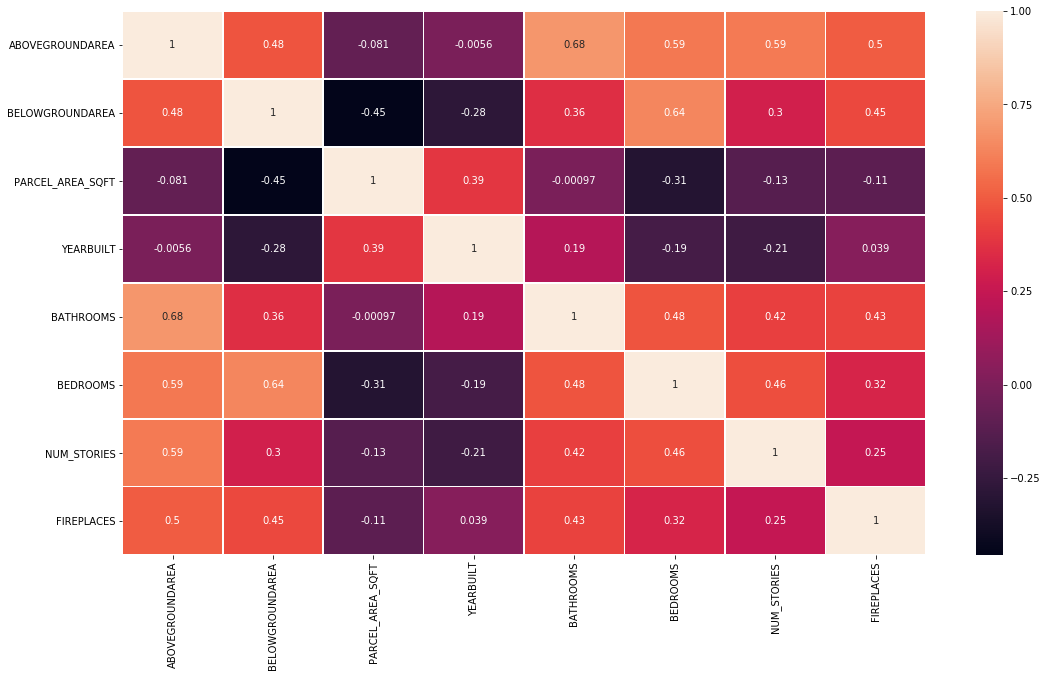

In [36]:
fig, ax = plt.subplots(figsize= (18,10))
sns.heatmap(corrmat, annot=True, linewidths=.5, annot_kws=())
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Correlations between features > 60% :
1. assessed value and sale price = 0.88
2. assed value and above ground area = 0.78
3. sale price and above ground area = 0.71
4. bathroom and above ground area = 0.68
5. bathroom and assessed value = 0.64
6. below ground area and bedrooms = 0.64

In [24]:
corr_features = df.iloc[:,1:12].corr()

(8.0, 0.0)

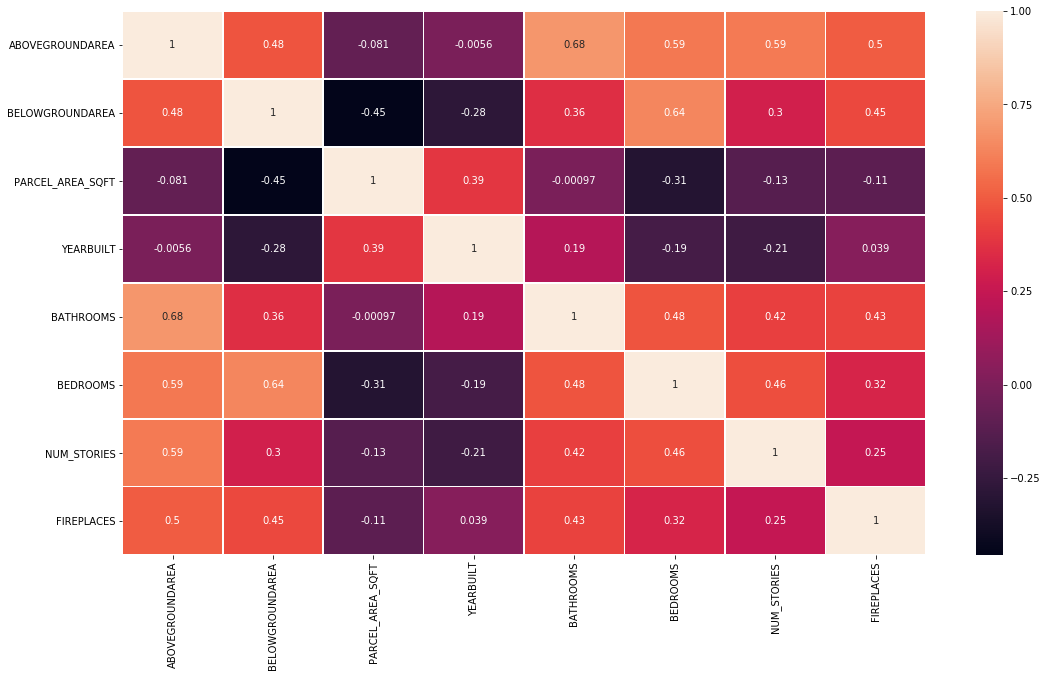

In [35]:
fig, ax = plt.subplots(figsize= (18,10))
sns.heatmap(corr_features, annot=True, linewidths=.5, annot_kws=())
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(8.5, 0.0)

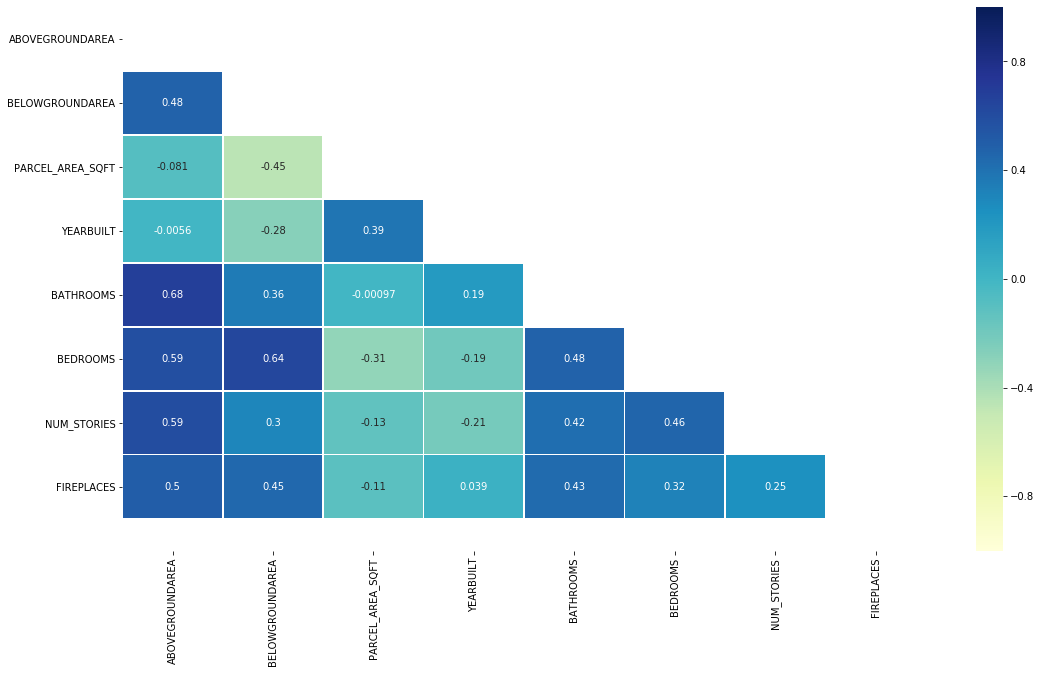

In [98]:
mask = np.zeros_like(corr_features, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize= (18,10))
sns.heatmap(corr_features,vmin=-1,cmap='YlGnBu',annot=True,linewidths=.5,mask = mask);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.0, top - 0.5)           

For the model, only include features that are highly correlated with your target variables. Any features that have low correlation will only increase model complexity and decrease model accuracy. Making a model to fit all features will be over complex and the model will give very low training error, but very high testing error. 


Since our target is Sale Price, we are going to create a list of features that has correlation with Sale Price that is greater than 50%.

In [41]:
corrmat.index

Index(['ABOVEGROUNDAREA', 'BELOWGROUNDAREA', 'PARCEL_AREA_SQFT', 'YEARBUILT',
       'BATHROOMS', 'BEDROOMS', 'NUM_STORIES', 'FIREPLACES'],
      dtype='object')

In [46]:
# Creating a function that selects features that has high correlation.

def getCorrelatedFeature(corrdata, threshold):
    feature=[]
    value=[]
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])

    df=pd.DataFrame(data=value,index=feature,columns=['Correlation Value'])
    return df

In [48]:
# Select features with correlatin with Sale Price > 50%

threshold=0.50
corr_value=getCorrelatedFeature(corrmat['Sale Price'], threshold)
corr_value

,Correlation Value
ABOVEGROUNDAREA,0.71
BATHROOMS,0.59
Assessed Value,0.88
Sale Price,1.00


In [49]:
corr_value.index.values
correlated_data=df[corr_value.index]
correlated_data.head()

,ABOVEGROUNDAREA,BATHROOMS,Assessed Value,Sale Price
47,343.00,1.00,91500,115000
48,343.00,1.00,93000,110000
49,344.00,1.00,80000,100000
51,361.00,1.00,91500,105000
52,362.00,1.00,68500,102735


In [50]:
X_corr=correlated_data.drop(labels=['Sale Price'], axis = 1)
y_corr=correlated_data['Sale Price']
X_corr.head()

,ABOVEGROUNDAREA,BATHROOMS,Assessed Value
47,343.00,1.00,91500
48,343.00,1.00,93000
49,344.00,1.00,80000
51,361.00,1.00,91500
52,362.00,1.00,68500


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [52]:
X_train_corr,X_test_corr,y_train_corr,y_test_corr=train_test_split(X_corr,y_corr, test_size=0.3, random_state=0)
X_train_corr.shape, X_test_corr.shape

((3978, 3), (1706, 3))

In [53]:
from sklearn.linear_model import LinearRegression
lr_corr=LinearRegression()
lr_corr.fit(X_train_corr, y_train_corr)
y_predict_corr=lr_corr.predict(X_test_corr)

In [54]:

df_ycorr=pd.DataFrame(data=[y_predict_corr, y_test_corr])
df_ycorr.T

,0,1
0,254308.16,259580.00
1,222351.70,209100.00
2,198941.91,165000.00
3,137413.42,187000.00
4,623859.23,725000.00
...,...,...
1701,216744.15,260000.00
1702,218030.36,200750.00
1703,1850553.57,1830000.00
1704,387748.77,345300.00


0 = Predicted, 1 = Actual

In [55]:
print('Linear Regression Accuracy =', lr_corr.score(X_test_corr,y_test_corr))

Linear Regression Accuracy = 0.8372961279489686


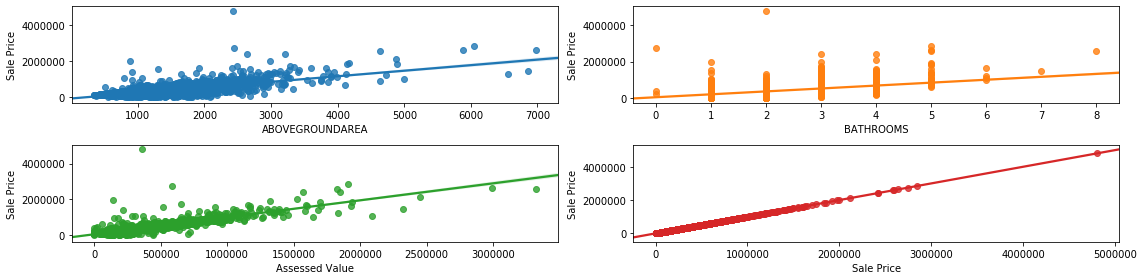

In [56]:
rows = 2
cols = 2
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))

col=correlated_data.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x=correlated_data[col[index]], y=correlated_data['Sale Price'], ax=ax[i][j])
        index=index+1
fig.tight_layout()

As above ground area, bathrooms, and assessed value increases, sale price also increase.

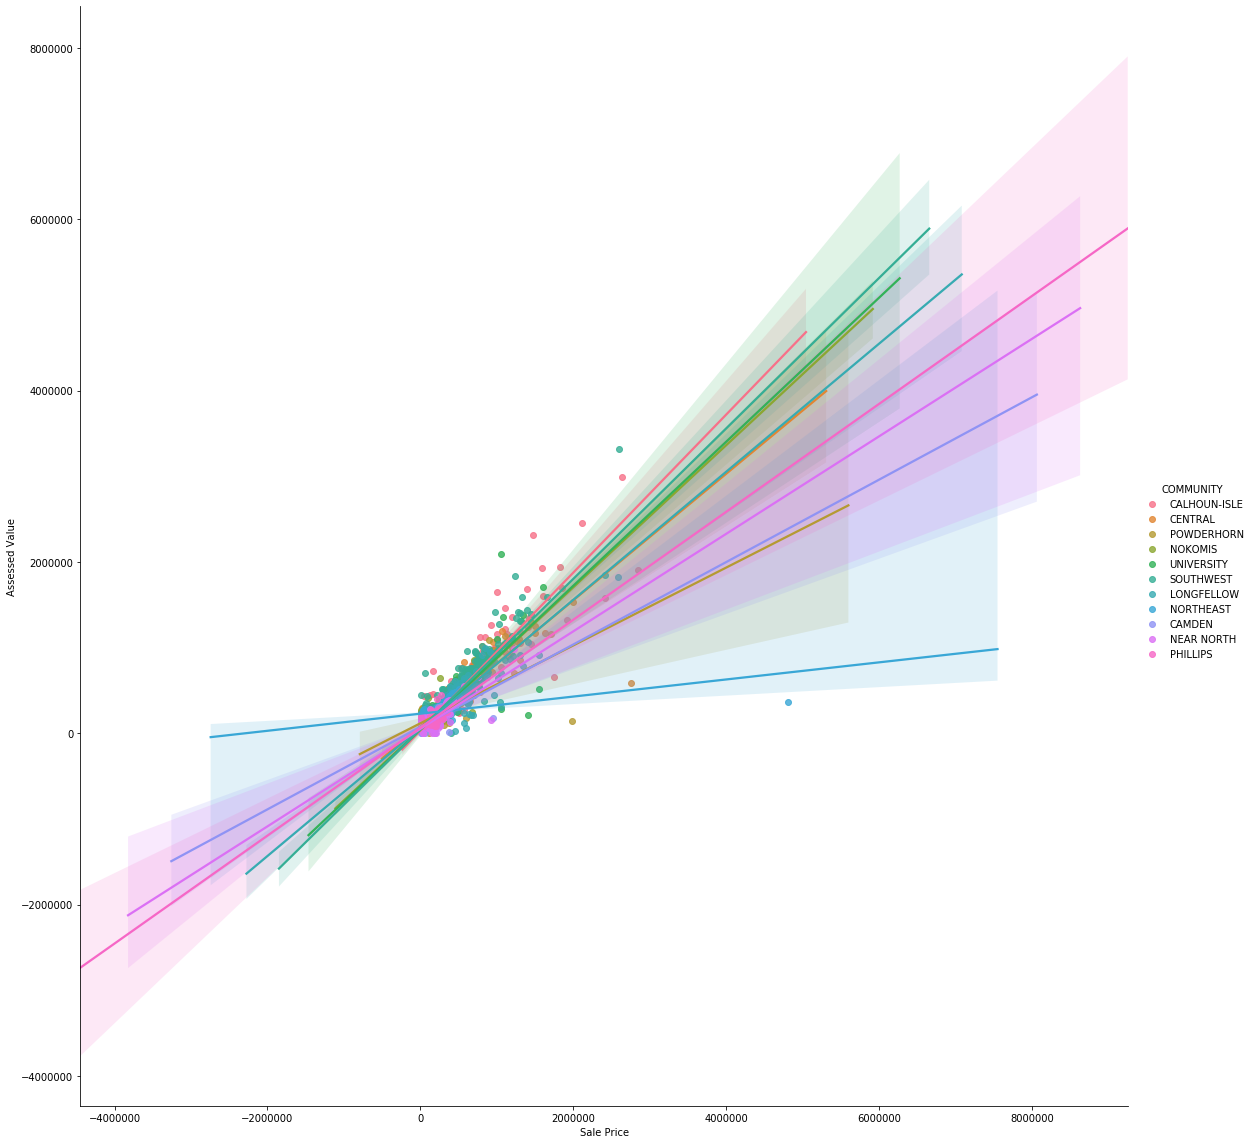

In [57]:
sns.lmplot(x='Sale Price', y='Assessed Value', hue='COMMUNITY', height=16, data=df)

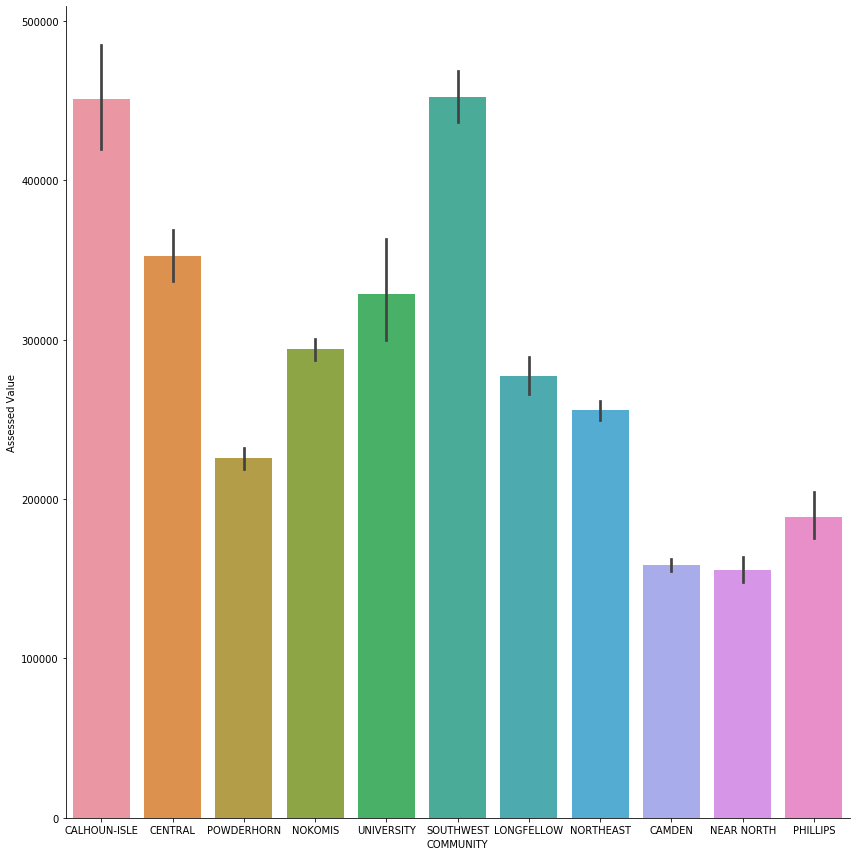

In [58]:
sns.catplot(x='COMMUNITY', y='Assessed Value', kind='bar',height=12, data=df)

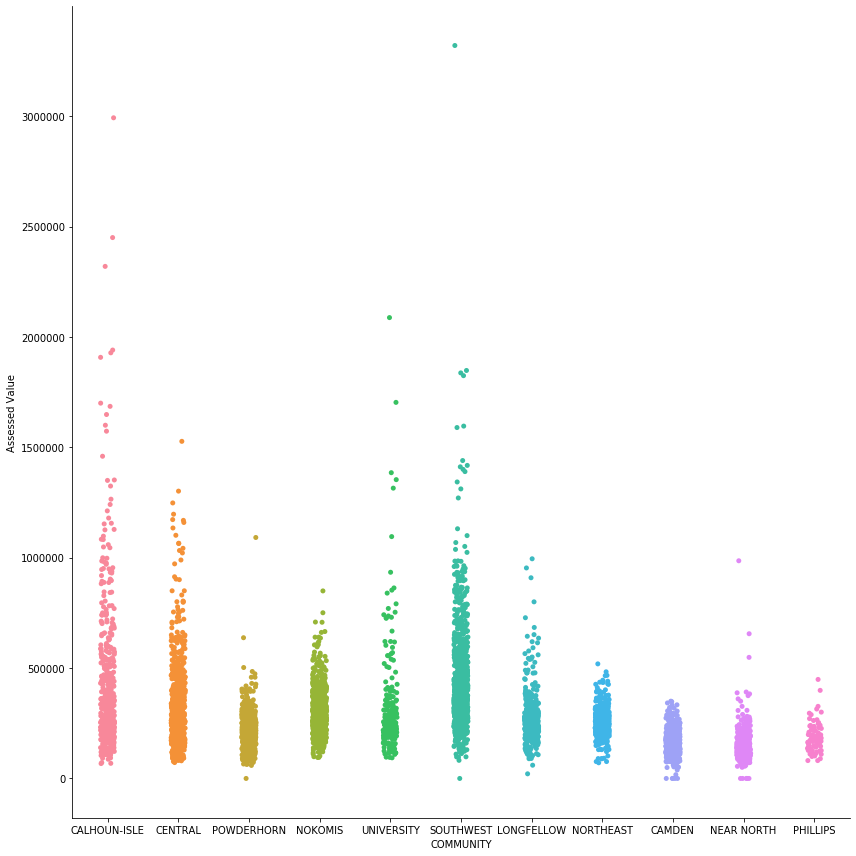

In [59]:
sns.catplot(x='COMMUNITY', y='Assessed Value', height=12, data=df)

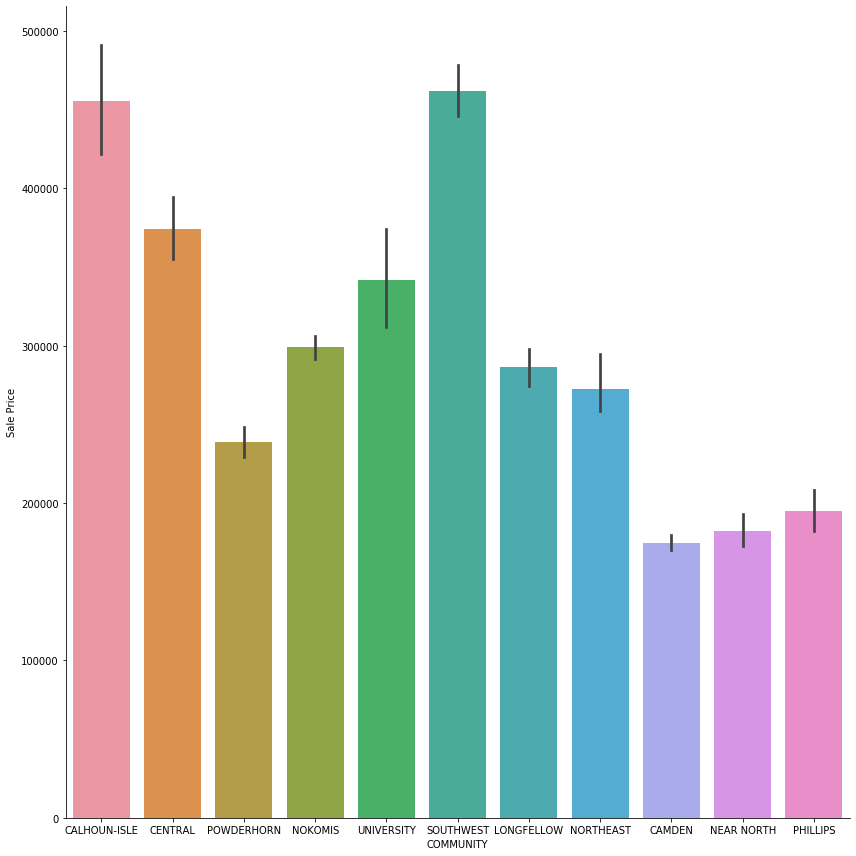

In [60]:
sns.catplot(x='COMMUNITY', y='Sale Price',kind='bar', height=12, data=df)

## This graph helps to see outliers and price distribution per community.

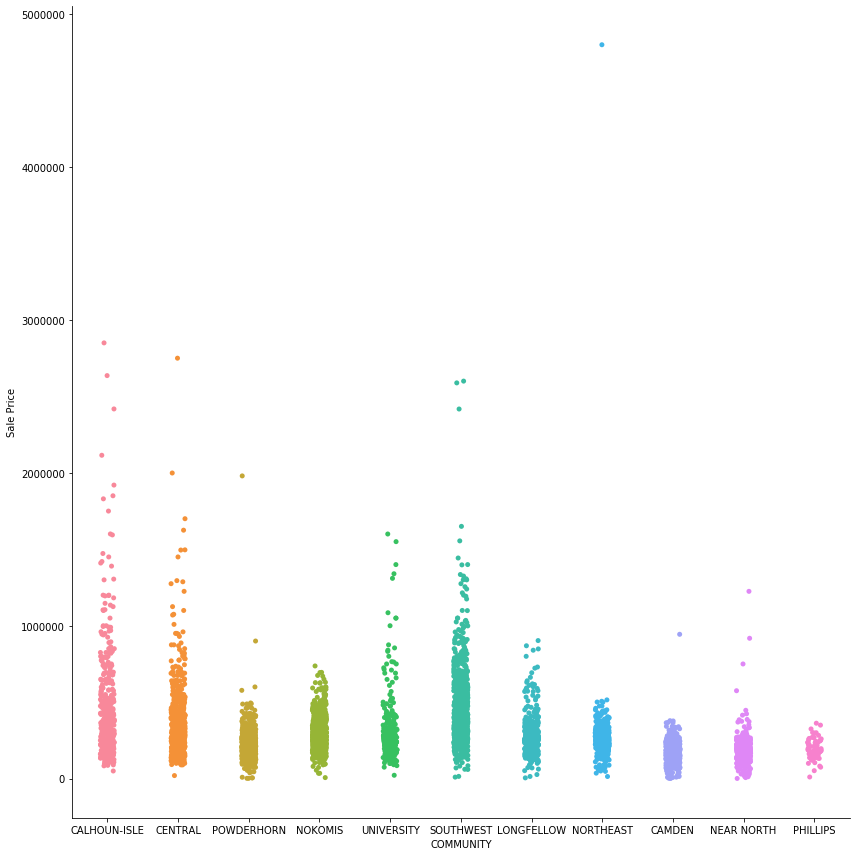

In [61]:
sns.catplot(x='COMMUNITY', y='Sale Price', height=12, data=df)

In [107]:
df.dtypes

APN                    int64
FORMATTED_ADDRESS     object
COMMUNITY             object
ABOVEGROUNDAREA      float64
BELOWGROUNDAREA      float64
PARCEL_AREA_SQFT       int64
YEARBUILT            float64
BATHROOMS            float64
BEDROOMS             float64
NUM_STORIES          float64
FIREPLACES           float64
CONSTRUCTIONTYPE      object
Assessed Value         int64
Sale Price             int64
dtype: object